In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = os.getcwd() + "/comment_train.csv"
train = pd.read_csv(train_path)
train.head()

,GoodTeaching,Comment
0,1,Anch 214 with Bergerson was a good class! He i...
1,0,The worst prof Ive ever had. Marks unnecessari...
2,0,This prof was not good at teaching at all. She...
3,1,He's an awesome professor! If you pay attentio...
4,0,I enjoyed chemistry but not with this teacher....


In [3]:
test_path = os.getcwd() + "/comment_test.csv"
test = pd.read_csv(test_path)

In [4]:
frames = [train, test]
total = pd.concat(frames)
# total.to_csv("comment_total.csv")

In [5]:
#!pip install wordcloud

In [6]:
from wordcloud import WordCloud
import re

### Text Preprocessing

In [7]:
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct

def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])      
    return no_digit

def text_processing(df):
    processed_text = []
    for line in df['Comment']:
        # convert to lowercase
        text_lowercase = line.lower()
        text_no_punct = remove_punctuation(text_lowercase)
        text_no_digit = remove_digit(text_no_punct)
        processed_text.append(text_no_digit)

    # save processed text
    df['comment_processed'] = pd.Series(processed_text)
    return df
    
total = text_processing(total)

In [8]:
total.head()

,GoodTeaching,Comment,comment_processed
0,1,Anch 214 with Bergerson was a good class! He i...,anch with bergerson was a good class he is an...
1,0,The worst prof Ive ever had. Marks unnecessari...,the worst prof ive ever had marks unnecessaril...
2,0,This prof was not good at teaching at all. She...,this prof was not good at teaching at all she ...
3,1,He's an awesome professor! If you pay attentio...,hes an awesome professor if you pay attention ...
4,0,I enjoyed chemistry but not with this teacher....,i enjoyed chemistry but not with this teacher ...


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evayi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evayi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

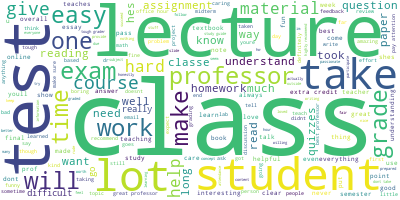

In [10]:
long_string = ','.join(list(total['comment_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words

def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document

def text_tokenize(df):
    text = df["comment_processed"]
    text_tokenized = text.apply(word_tokenize)
    text_no_stop = text_tokenized.apply(remove_stopwords)
    df["comment_nostop"] = text_no_stop
    text_stemmed = text_no_stop.apply(stemmer)
    df["comment_tokenized"] = text_stemmed
    return df

total = text_tokenize(total)

In [12]:
total.head()

,GoodTeaching,Comment,comment_processed,comment_nostop,comment_tokenized
0,1,Anch 214 with Bergerson was a good class! He i...,anch with bergerson was a good class he is an...,"[anch, bergerson, good, class, awesome, profes...","[anch, bergerson, good, class, awesom, profess..."
1,0,The worst prof Ive ever had. Marks unnecessari...,the worst prof ive ever had marks unnecessaril...,"[worst, prof, ive, ever, marks, unnecessarily,...","[worst, prof, ive, ever, mark, unnecessarili, ..."
2,0,This prof was not good at teaching at all. She...,this prof was not good at teaching at all she ...,"[prof, good, teaching, harsh, hard, pay, atten...","[prof, good, teach, harsh, hard, pay, attent, ..."
3,1,He's an awesome professor! If you pay attentio...,hes an awesome professor if you pay attention ...,"[hes, awesome, professor, pay, attention, copy...","[he, awesom, professor, pay, attent, copi, cla..."
4,0,I enjoyed chemistry but not with this teacher....,i enjoyed chemistry but not with this teacher ...,"[enjoyed, chemistry, teacher, lecture, literal...","[enjoy, chemistri, teacher, lectur, liter, say..."


In [13]:
train_df = text_processing(train)
train_df = text_tokenize(train_df)
train_df.head()

,GoodTeaching,Comment,comment_processed,comment_nostop,comment_tokenized
0,1,Anch 214 with Bergerson was a good class! He i...,anch with bergerson was a good class he is an...,"[anch, bergerson, good, class, awesome, profes...","[anch, bergerson, good, class, awesom, profess..."
1,0,The worst prof Ive ever had. Marks unnecessari...,the worst prof ive ever had marks unnecessaril...,"[worst, prof, ive, ever, marks, unnecessarily,...","[worst, prof, ive, ever, mark, unnecessarili, ..."
2,0,This prof was not good at teaching at all. She...,this prof was not good at teaching at all she ...,"[prof, good, teaching, harsh, hard, pay, atten...","[prof, good, teach, harsh, hard, pay, attent, ..."
3,1,He's an awesome professor! If you pay attentio...,hes an awesome professor if you pay attention ...,"[hes, awesome, professor, pay, attention, copy...","[he, awesom, professor, pay, attent, copi, cla..."
4,0,I enjoyed chemistry but not with this teacher....,i enjoyed chemistry but not with this teacher ...,"[enjoyed, chemistry, teacher, lecture, literal...","[enjoy, chemistri, teacher, lectur, liter, say..."


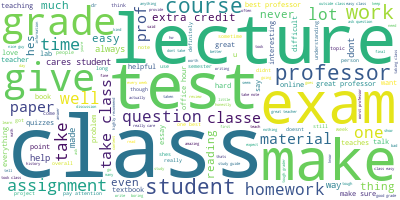

In [14]:
# word cloud with stop word removed
long_string = ','.join(list(total['comment_nostop'].map(lambda x: ' '.join(x)).values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [15]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df=0.005)

def document_term_matrix(data, countvec):
    text = data["comment_tokenized"]
    text_detokenized = text.apply(TreebankWordDetokenizer().detokenize)
    
    sparse_dtm = countvec.fit_transform(text_detokenized)
    text = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=data.index)
    
    return text

df_train = document_term_matrix(train_df,countvec)
df_train.head()

,abl,absolut,accent,access,accommod,account,activ,actual,advic,ahead,...,write,written,wrong,wrote,ye,year,yet,youll,your,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
frequencies = df_train.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

class        19636
professor     8557
take          7097
lectur        6174
grade         5056
             ...  
hope           104
flexibl        103
within         103
depend         102
whatev         102
Length: 636, dtype: int64


In [17]:
test_df = text_processing(test)
test_df = text_tokenize(test_df)
countvec = CountVectorizer()
df_test = document_term_matrix(test_df,countvec)

In [18]:
columns_inter = df_test.columns.intersection(df_train.columns) # columns in both train and test
columns_train = df_train.columns.difference(df_test.columns)# columns in train not in test
columns_test = df_test.columns.difference(df_train.columns) # columns in test not in train
print("columns in both train and test set:", len(columns_inter))
print("columns in train set:", len(columns_train))
print("columns in test set:", len(columns_test))

columns in both train and test set: 636
columns in train set: 0
columns in test set: 7017


In [19]:
df_test = df_test[columns_inter]

## Train the model

In [20]:
X_train = df_train
y_train = train["GoodTeaching"].astype('int32')
X_test = df_test
y_test = test["GoodTeaching"].astype('int32')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20131, 636), (20131,), (6711, 636), (6711,))

Our evaluation matrix

In [21]:
def getFourMeasures(y_actual, y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y_actual)):
        if y_actual[i] == y_pred[i] and y_pred[i] == 1:
            TP += 1
        if y_pred[i]== 0 and y_actual[i] != y_pred[i]:
            FN += 1
        if y_pred[i]== 1 and y_actual[i] != y_pred[i]:
            FP += 1
        if y_actual[i]== y_pred[i] == 0:
            TN += 1
    return (TP, FN, FP, TN)

# TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(test_pred))
# TPR = TP / (TP + FN)
# FPR = FP / (FP + TN)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [23]:
from scipy.stats import norm
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const      0.000008
abl        0.318456
absolut    0.203408
accent     0.000041
access     0.007622
             ...   
year       0.124199
yet        0.002205
youll      0.000487
your       0.092475
zoom       0.419937
Length: 637, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    19494
Method:                           MLE   Df Model:                          636
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.5525
Time:                        14:36:50   Log-Likelihood:                -6013.4
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2783      0.062      4.461      0.000       0.156       0.401
abl                 0.1917      0.192      0.998      0.318      -0.185       0.568
absolut             0.2323      0.183      1.272      0.203      -0.126       0.590
accent             -1.1738      0.286     -4.099      0.000      -1.735      -0.613
access              0.5313      0.199      2.668      0.008       0.141       0.922
accommod           -0.2528      0.331     -0.763      0.445      -0.902       0.396
account             0.2306      0.225      1.026      0.305      -0.210       0.671
activ               0.3635      0.290      1.254      0.210      -0.205       0.932
actual              0.2258      0.120      1.885      0.059      -0.009       0.461
advic              -0.7603      0.292     -2.603      0.009      -1.333      -0.188
ahead              -0.0677      0.300     -0.226      0.822      -0.656       0.521
allow               0.0336      0.196      0.171      0.864      -0.351       0.418
almost             -0.0388      0.183     -0.212      0.832      -0.397       0.320
along              -0.2555      0.246     -1.037      0.300      -0.738       0.227
alreadi            -0.9270      0.251     -3.694      0.000      -1.419      -0.435
also               -0.0423      0.083     -0.509      0.611      -0.205       0.121
although           -0.0337      0.187     -0.180      0.857      -0.401       0.334
alway               0.5478      0.100      5.500      0.000       0.353       0.743
amaz                2.7566      0.206     13.378      0.000       2.353       3.160
amount             -0.1858      0.166     -1.116      0.264      -0.512       0.140
annoy              -0.7309      0.282     -2.593      0.010      -1.283      -0.178
anoth              -0.9562      0.180     -5.312      0.000      -1.309      -0.603
answer             -0.0200      0.095     -0.210      0.833      -0.206       0.166
anyon               0.5134      0.227      2.263      0.024       0.069       0.958
anyth              -0.5759      0.130     -4.425      0.000      -0.831      -0.321
appli               0.1160      0.306      0.379      0.704      -0.483       0.715
appreci             0.7216      0.319      2.264      0.024       0.097       1.346
approach            0.3707      0.243      1.523      0.128      -0.106       0.848
arent              -0.1806      0.161     -1.121      0.262      -0.496       0.135
around             -0.1479      0.200     -0.738      0.461      -0.541       0.245
art                 0.1381      0.226      0.610      0.542      -0.305       0.582
articl              0.1757      0.273      0.644      0.519      -0.359       0.710
ask                -0.0626      0.095     -0.657      0.511      -0.249       0.124
assign             -0.0624      0.058     -1.084      0.279      -0.175       0.050
attend              0.2169      0.103      2.115      0.034       0.016       0.418
attent              0.7958      0.250      3.179 

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(y_pred))
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))
print ("TPR:", TPR)
print ("FPR:", FPR)

Confusion Matrix: 
 [[2065  534]
 [ 422 3690]]

Accuracy: 0.8575473103859336
TPR: 0.8973735408560312
FPR: 0.2054636398614852


In [26]:
importance=logreg.coef_[0]
importance=np.sort(importance)
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : -2.9000648022987288 
Feature : 1 has score  : -2.410294414423752 
Feature : 2 has score  : -2.365984354590305 
Feature : 3 has score  : -2.360268861356797 
Feature : 4 has score  : -2.3536060510511936 
Feature : 5 has score  : -1.8223966310713613 
Feature : 6 has score  : -1.7736948022098151 
Feature : 7 has score  : -1.6680951704960472 
Feature : 8 has score  : -1.6607897108863858 
Feature : 9 has score  : -1.6315817045102137 
Feature : 10 has score  : -1.4896079377568028 
Feature : 11 has score  : -1.467696853244632 
Feature : 12 has score  : -1.4557350049439002 
Feature : 13 has score  : -1.3896515247650876 
Feature : 14 has score  : -1.3275770760676102 
Feature : 15 has score  : -1.3168952094138777 
Feature : 16 has score  : -1.3018218698822954 
Feature : 17 has score  : -1.1869942851896076 
Feature : 18 has score  : -1.1701350142071971 
Feature : 19 has score  : -1.1304641877963189 
Feature : 20 has score  : -1.103125468569561 
Feature : 21 has score  : -1

### LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(y_pred))
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))
print ("TPR:", TPR)
print ("FPR:", FPR)

Confusion Matrix: 
 [[1981  618]
 [ 376 3736]]

Accuracy: 0.8518849649828639
TPR: 0.9085603112840467
FPR: 0.23778376298576376


### CART

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid_values = {'ccp_alpha': np.linspace(0, 0.01, 21)}

dtc = DecisionTreeClassifier(random_state=10)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

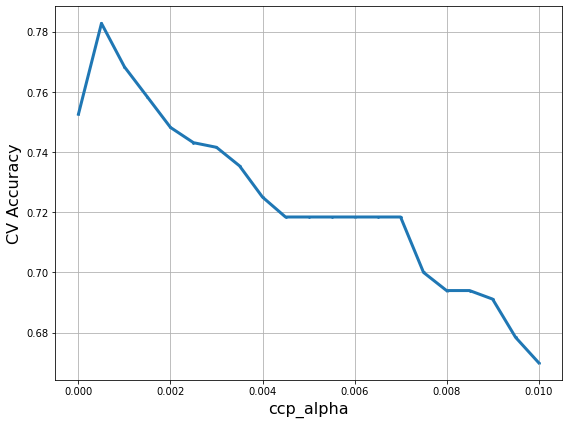

Best ccp_alpha {'ccp_alpha': 0.0005}


In [28]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(y_pred))
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))
print ("TPR:", TPR)
print ("FPR:", FPR)

Confusion Matrix: 
 [[1833  766]
 [ 760 3352]]

Accuracy: 0.7726121293398898
TPR: 0.8151750972762646
FPR: 0.2947287418237784


### Feature Importance

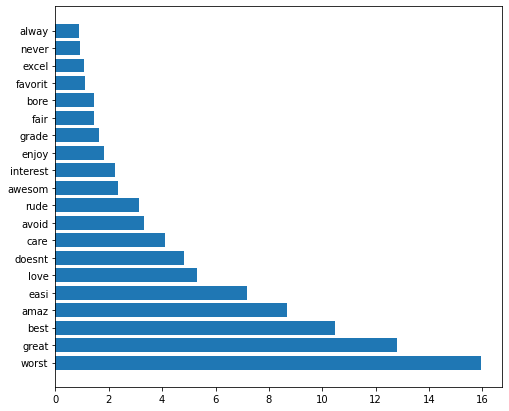

In [30]:
sorted_idx = dtc_cv.best_estimator_.feature_importances_.argsort()
feature_importances = dtc_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8, 7))
plt.barh(feature_names[:20], 100 * feature_importances[:20])
plt.show()

### Bootstrap

In [31]:
np.random.seed(1234)
# We first define metrics functions
def get_accuracy(predictions, y_test, y_train):
    return accuracy_score(y_test, predictions)

def get_TPR(predictions, y_test, y_train):
    TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(predictions))
    TPR = TP / (TP + FN)
    return TPR
    
def get_FPR(predictions, y_test, y_train):
    TP,FN,FP,TN = getFourMeasures(np.array(y_test), np.array(predictions))
    FPR = FP / (FP + TN)
    return FPR

In [32]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
print("Accuracy: %s" % get_accuracy(y_pred,y_test,y_train))
print("TPR: %s" % get_TPR(y_pred,y_test,y_train))
print("FPR: %s" % get_FPR(y_pred,y_test,y_train))

Accuracy: 0.8575473103859336
TPR: 0.8973735408560312
FPR: 0.2054636398614852


In [33]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=10):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_prob = model.predict_proba(bs_data)
        bs_predicted = pd.Series([1 if x > 0.5 else 0 for x in bs_prob[:,1]], index=y_test.index)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [34]:
bs_output = bootstrap_validation(X_test,y_test,y_train,logreg,
                                 metrics_list=[get_accuracy, get_TPR, get_FPR],
                                 sample = 10000)

(10000, 3)


(-0.15, 0.15)

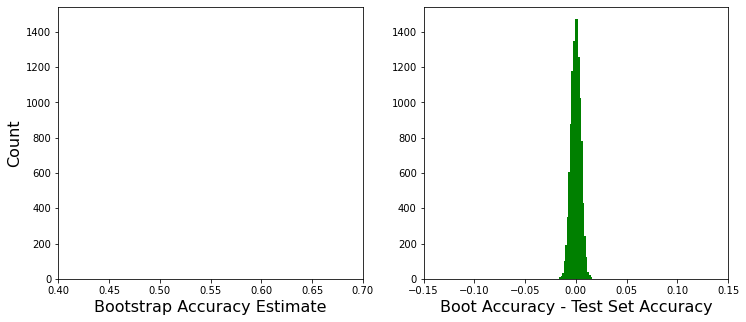

In [35]:
test_accuracy = get_accuracy(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,0]-test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

In [36]:
CI= np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy is %s" % CI)

The 95-percent confidence interval of accuracy is [0.84905379 0.86589182]


(-0.15, 0.15)

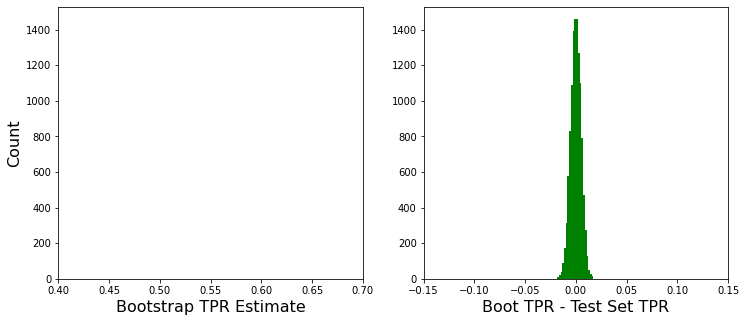

In [37]:
test_TPR = get_TPR(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap TPR Estimate', fontsize=16)
axs[1].set_xlabel('Boot TPR - Test Set TPR', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,1]-test_TPR, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

In [38]:
CI= np.quantile(bs_output.iloc[:,1],np.array([0.025,0.975]))
print("The 95-percent confidence interval of TPR is %s" % CI)

The 95-percent confidence interval of TPR is [0.8880697  0.90646963]


(-0.15, 0.15)

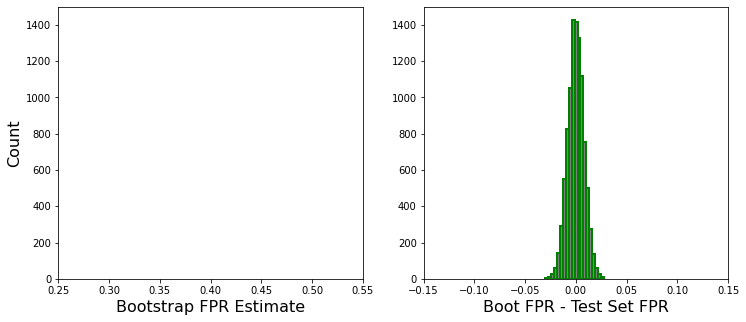

In [39]:
test_FPR = get_FPR(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap FPR Estimate', fontsize=16)
axs[1].set_xlabel('Boot FPR - Test Set FPR', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,2], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.25,0.55])
axs[1].hist(bs_output.iloc[:,2]-test_FPR, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

In [40]:
CI= np.quantile(bs_output.iloc[:,2],np.array([0.025,0.975]))
print("The 95-percent confidence interval of FPR is %s" % CI)

The 95-percent confidence interval of FPR is [0.19004838 0.22111988]
